## importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
sns.set()

In [2]:
train_data = pd.read_csv("flight_data.csv")

In [4]:
train_data = train_data.iloc[: , 1:]
train_data.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [5]:
train_data.shape

(280821, 14)

In [6]:
train_data.isnull().sum()

Price                0
departure_time       0
arrival_time         0
Airline              0
Cabin                0
Dept_city            0
Dept_date            0
arrival_city         0
stops                0
duration             0
weekday              0
dept_hours           0
Dept_flights_time    0
optimal_hours        0
dtype: int64

In [8]:
train_data.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,280821.000000,280821.000000,280821.000000,280821.000000,280821.000000,280821.000000,280821.000000
mean,14512.834101,16.650632,1.215999,580.734525,2.916605,12.950520,12.453577
std,16689.360801,8.099170,0.797486,365.617589,2.085034,4.982149,6.948914
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5046.000000,10.000000,1.000000,310.000000,1.000000,9.000000,7.000000
50%,7039.000000,17.000000,1.000000,510.000000,3.000000,13.000000,13.000000
75%,12481.000000,23.000000,2.000000,840.000000,5.000000,17.000000,19.000000
max,115432.000000,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000


In [11]:
train_data.Dept_city = train_data.Dept_city.str.replace(' ', '')
train_data.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,NewDelhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,NewDelhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,NewDelhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,NewDelhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,NewDelhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [12]:
train_data.arrival_city = train_data.arrival_city.str.replace(' ', '')
train_data.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,NewDelhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,NewDelhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,NewDelhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,NewDelhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,NewDelhi,1,Mumbai,1,320,5,9,Morning_flight,6


## EDA

In [15]:
train_data['Dept_city'].unique()

array(['NewDelhi', 'Mumbai', 'Bengaluru', 'Hyderabad', 'Chennai',
       'Kolkata', 'Kochi', 'Goa', 'Pune', 'Guwahati', 'Lucknow', 'Jaipur',
       'Patna', 'Thiruvananthapuram', 'Bhubaneswar', 'Kozhikode',
       'Bagdogra', 'Nagpur', 'Varanasi', 'Indore', 'Coimbatore',
       'Srinagar', 'Visakhapatnam', 'Ranchi', 'Amritsar', 'Chandigarh',
       'Raipur', 'Mangalore', 'PortBlair', 'Tiruchirappalli'],
      dtype=object)

In [16]:
train_data['arrival_city'].unique()

array(['Mumbai', 'Bengaluru', 'Hyderabad', 'Chennai', 'Kochi', 'Goa',
       'Pune', 'Guwahati', 'Jaipur', 'Thiruvananthapuram', 'Bhubaneswar',
       'Coimbatore', 'Visakhapatnam', 'Raipur', 'PortBlair', 'NewDelhi',
       'Kolkata', 'Lucknow', 'Patna', 'Kozhikode', 'Bagdogra', 'Nagpur',
       'Varanasi', 'Srinagar', 'Amritsar', 'Indore', 'Ranchi',
       'Chandigarh', 'Mangalore', 'Tiruchirappalli'], dtype=object)

In [17]:
# extracting hours and minute from departure_time	arrival_time

train_data["Dep_hour"] = pd.to_datetime(train_data["departure_time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["departure_time"]).dt.minute

train_data.drop(["departure_time"], axis = 1, inplace = True)
train_data.drop(["dept_hours"], axis = 1, inplace = True)

In [18]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.arrival_time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.arrival_time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["arrival_time"], axis = 1, inplace = True)


In [19]:
train_data.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3112,AirAsia,E,NewDelhi,1,Mumbai,1,350,5,Afternoon_flight,11,14,30,20,20
1,3113,Go Air,E,NewDelhi,1,Mumbai,1,255,5,Evening_flight,13,16,55,21,10
2,3113,Go Air,E,NewDelhi,1,Mumbai,1,260,5,Evening_flight,13,16,45,21,5
3,3113,Go Air,E,NewDelhi,1,Mumbai,1,305,5,Morning_flight,4,7,55,13,0
4,3113,Go Air,E,NewDelhi,1,Mumbai,1,320,5,Morning_flight,6,9,0,14,20


In [20]:
train_data['weekday'].unique()

array([5, 6, 0, 1, 3, 4, 2], dtype=int64)

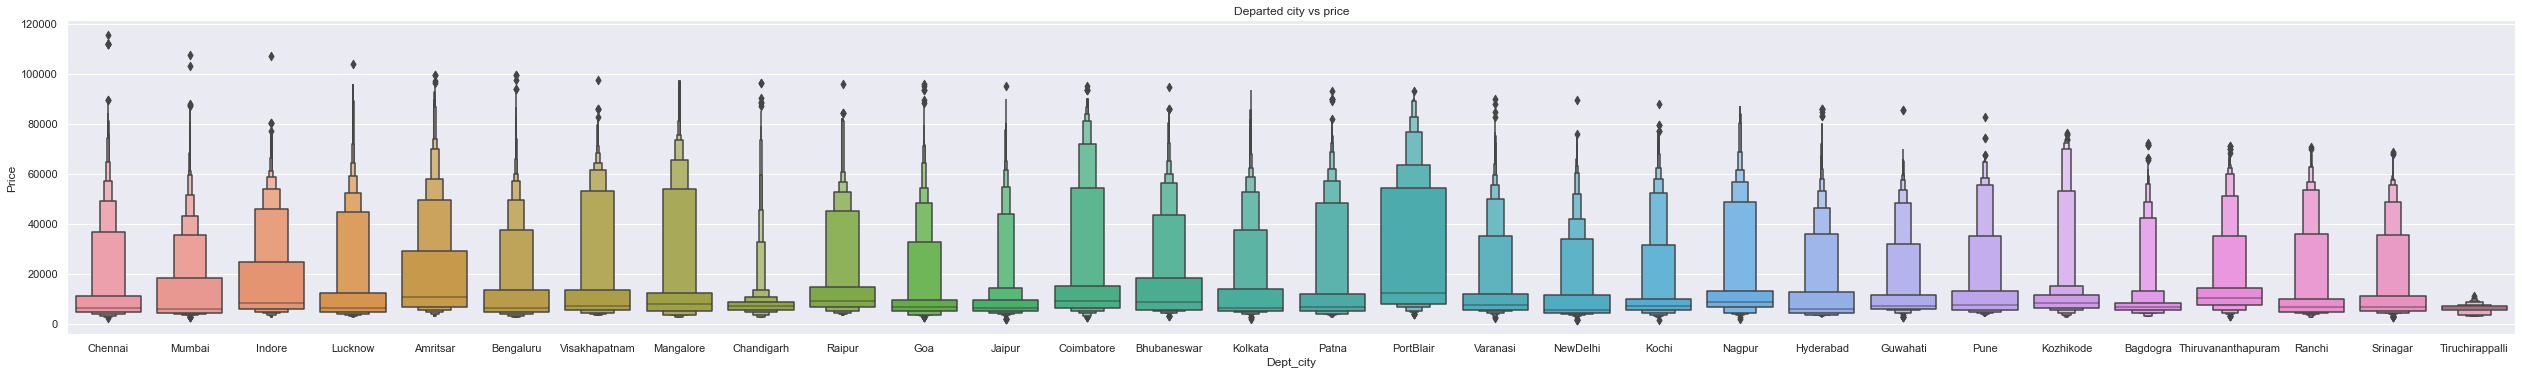

In [21]:
sns.catplot(y = "Price", x = "Dept_city", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 7)
plt.title("Departed city vs price")
plt.show()

<AxesSubplot:>

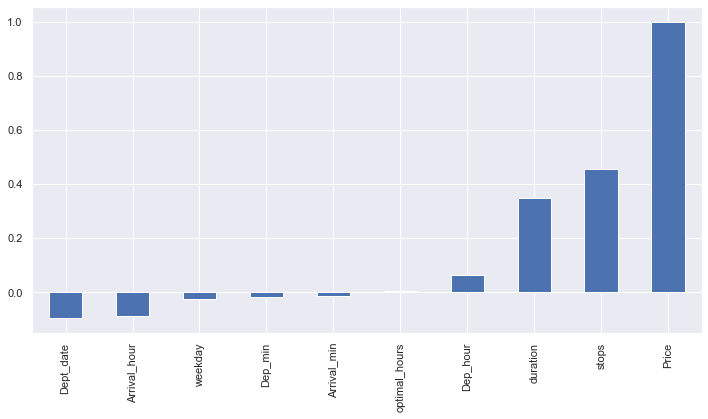

In [22]:
plt.figure(figsize=(12,6))
train_data.corr()['Price'].sort_values().plot(kind='bar')

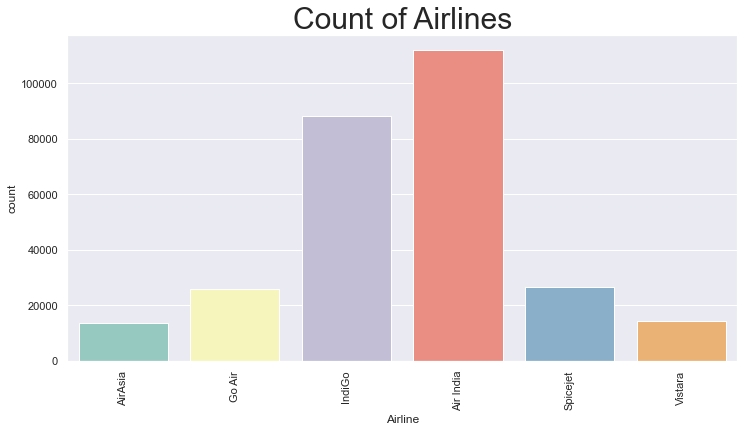

In [23]:
#lets see which airline company has highest counts
plt.figure(figsize=(12,6))
sns.countplot(x=train_data['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

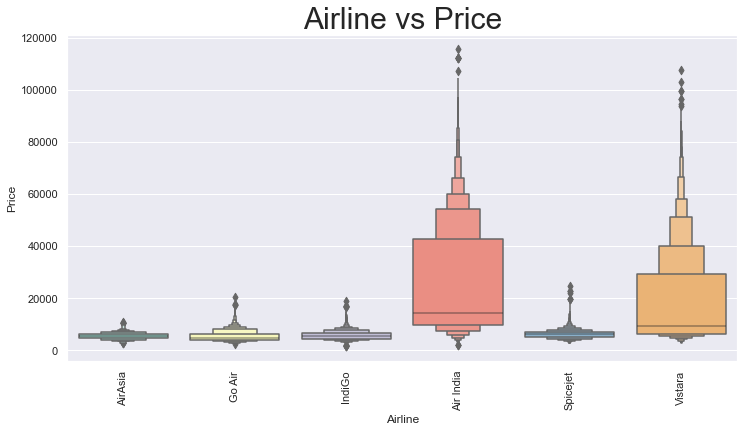

In [24]:
# lets check ariline and their prices
plt.figure(figsize=(12,6))
sns.boxenplot(x =train_data['Airline'], y=train_data['Price'], palette='Set3')
plt.title('Airline vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

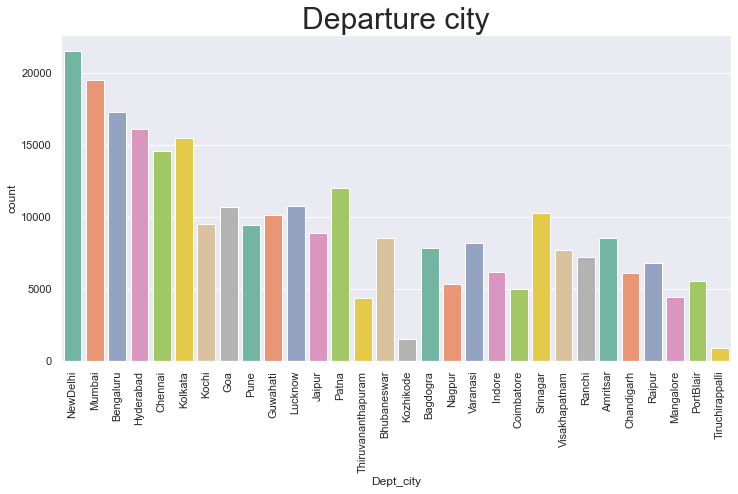

In [25]:
# lets see how many flight took off from dept_city 
plt.figure(figsize=(12,6))
sns.countplot(x=train_data['Dept_city'], palette='Set2')
plt.title('Departure city', size=30)
plt.xticks(rotation=90)
plt.show()

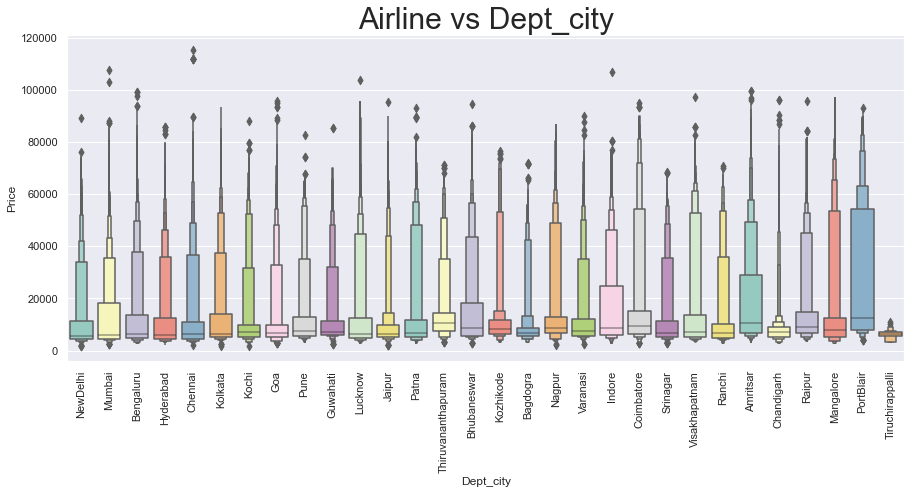

In [26]:
# airlines vs Dept_city
plt.figure(figsize=(15,6))
sns.boxenplot(x=train_data['Dept_city'],y= train_data['Price'], palette='Set3')
plt.title('Airline vs Dept_city', size=30)
plt.xticks(rotation=90)
plt.show()

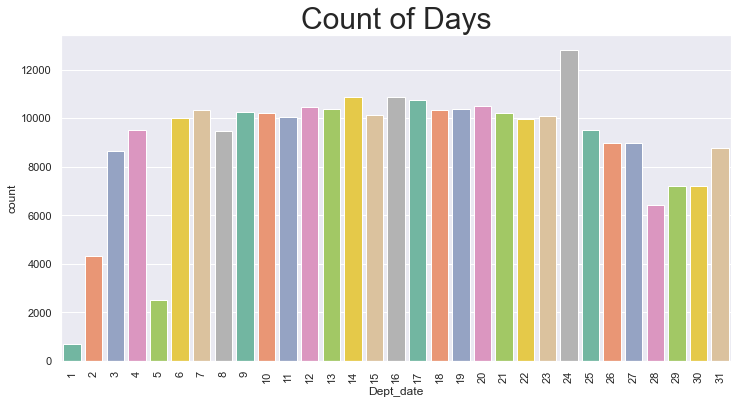

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data['Dept_date'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

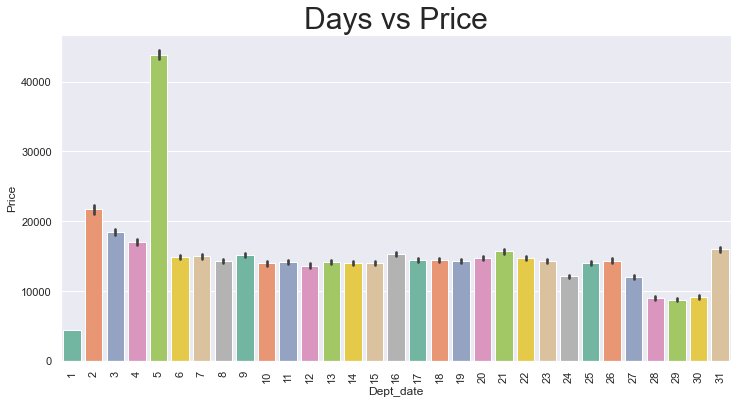

In [28]:
# lets see date vs prices
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['Dept_date'], y=train_data['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

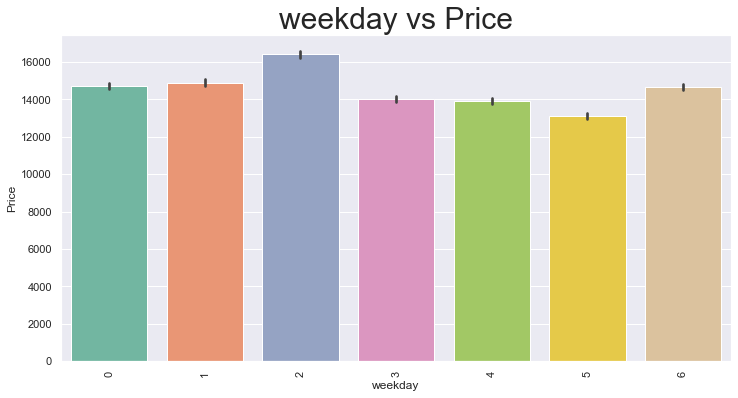

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['weekday'], y=train_data['Price'], palette='Set2')
plt.title('weekday vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

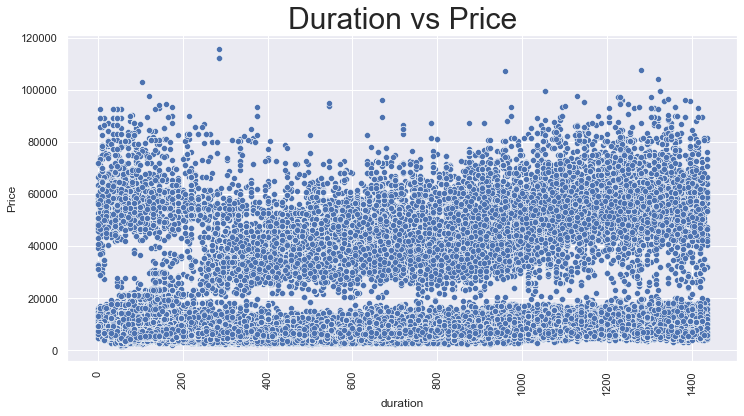

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_data['duration'], y=train_data['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

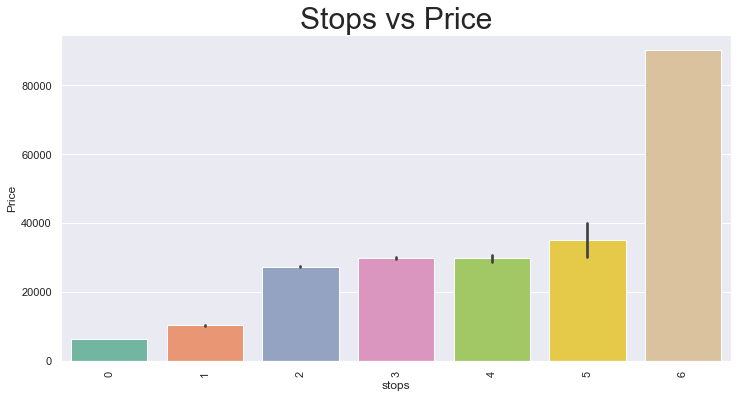

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['stops'], y=train_data['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

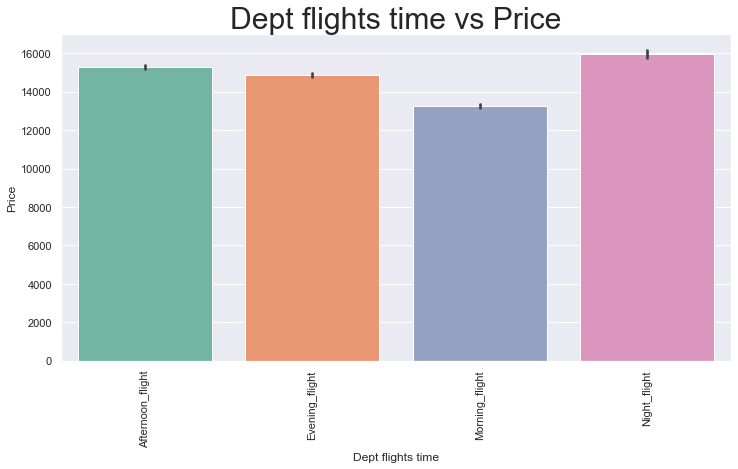

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['Dept_flights_time'], y=train_data['Price'], palette='Set2')
plt.title('Dept flights time vs Price', size=30)
plt.xlabel("Dept flights time")
plt.xticks(rotation=90)
plt.show()

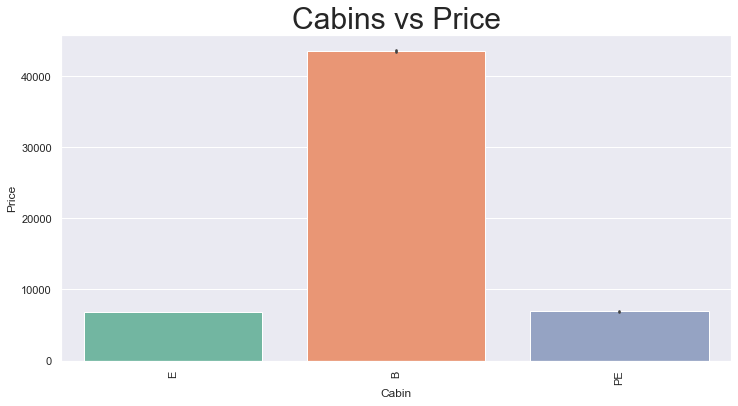

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['Cabin'], y=train_data['Price'], palette='Set2')
plt.title('Cabins vs Price', size=30)
plt.xlabel("Cabin")
plt.xticks(rotation=90)
plt.show()

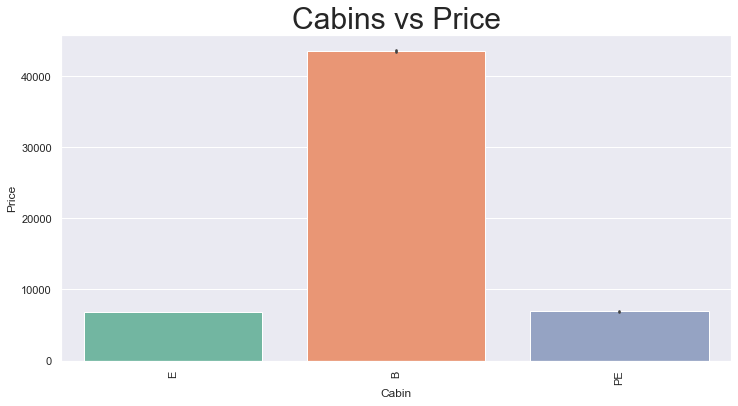

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['Cabin'], y=train_data['Price'], palette='Set2')
plt.title('Cabins vs Price', size=30)
plt.xlabel("Cabin")
plt.xticks(rotation=90)
plt.show()

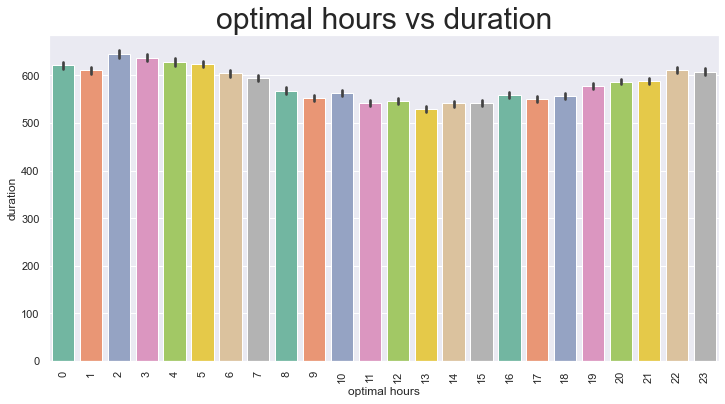

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['optimal_hours'], y=train_data['duration'], palette='Set2')
plt.title('optimal hours vs duration', size=30)
plt.xlabel("optimal hours")
plt.xticks(rotation=90)
plt.show()

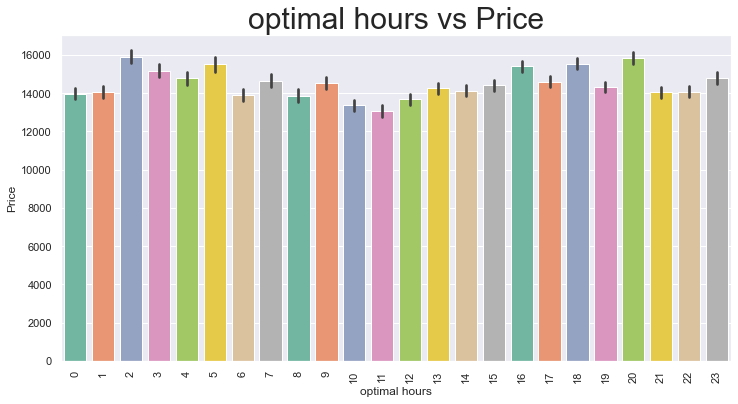

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x=train_data['optimal_hours'], y=train_data['Price'], palette='Set2')
plt.title('optimal hours vs Price', size=30)
plt.xlabel("optimal hours")
plt.xticks(rotation=90)
plt.show()

### Now lets take care of categorical features

In [37]:
train_data.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3112,AirAsia,E,NewDelhi,1,Mumbai,1,350,5,Afternoon_flight,11,14,30,20,20
1,3113,Go Air,E,NewDelhi,1,Mumbai,1,255,5,Evening_flight,13,16,55,21,10
2,3113,Go Air,E,NewDelhi,1,Mumbai,1,260,5,Evening_flight,13,16,45,21,5
3,3113,Go Air,E,NewDelhi,1,Mumbai,1,305,5,Morning_flight,4,7,55,13,0
4,3113,Go Air,E,NewDelhi,1,Mumbai,1,320,5,Morning_flight,6,9,0,14,20


In [39]:
train_data.columns

Index(['Price', 'Airline', 'Cabin', 'Dept_city', 'Dept_date', 'arrival_city',
       'stops', 'duration', 'weekday', 'Dept_flights_time', 'optimal_hours',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [40]:
train_data['duration'] = pd.to_datetime(train_data.duration, unit='m').dt.strftime('%H:%M')
train_data.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3112,AirAsia,E,1,1,2,1,05:50,5,Afternoon_flight,11,14,30,20,20
1,3113,Go Air,E,1,1,2,1,04:15,5,Evening_flight,13,16,55,21,10
2,3113,Go Air,E,1,1,2,1,04:20,5,Evening_flight,13,16,45,21,5
3,3113,Go Air,E,1,1,2,1,05:05,5,Morning_flight,4,7,55,13,0
4,3113,Go Air,E,1,1,2,1,05:20,5,Morning_flight,6,9,0,14,20


In [44]:
train_data["Duration_hour"] = pd.to_datetime(train_data["duration"]).dt.hour
train_data["Duration_min"] = pd.to_datetime(train_data["duration"]).dt.minute

train_data.drop(["duration"], axis = 1, inplace = True)
train_data.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3112,AirAsia,E,1,1,2,1,5,Afternoon_flight,11,14,30,20,20,5,50
1,3113,Go Air,E,1,1,2,1,5,Evening_flight,13,16,55,21,10,4,15
2,3113,Go Air,E,1,1,2,1,5,Evening_flight,13,16,45,21,5,4,20
3,3113,Go Air,E,1,1,2,1,5,Morning_flight,4,7,55,13,0,5,5
4,3113,Go Air,E,1,1,2,1,5,Morning_flight,6,9,0,14,20,5,20


In [45]:
#covert Airlines and cabin into ohe
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,AirAsia,Go Air,IndiGo,Spicejet,Vistara
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [46]:
Cabin = train_data['Cabin']
Cabin = pd.get_dummies(Cabin , drop_first=True)
Cabin.head()

,E,PE
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
train_data.replace({"Morning_flight": 0, "Afternoon_flight": 1, "Evening_flight": 2, "Night_flight":3}, inplace = True)
train_data

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3112,AirAsia,E,1,1,2,1,5,1,11,14,30,20,20,5,50
1,3113,Go Air,E,1,1,2,1,5,2,13,16,55,21,10,4,15
2,3113,Go Air,E,1,1,2,1,5,2,13,16,45,21,5,4,20
3,3113,Go Air,E,1,1,2,1,5,0,4,7,55,13,0,5,5
4,3113,Go Air,E,1,1,2,1,5,0,6,9,0,14,20,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280816,9338,Spicejet,PE,29,30,2,1,6,0,15,9,50,23,50,14,0
280817,9338,Spicejet,PE,29,30,2,1,6,0,15,9,50,8,20,22,30
280818,11092,Spicejet,PE,29,30,3,1,6,0,15,9,50,9,5,23,15
280819,5588,Spicejet,PE,29,30,5,0,6,0,15,9,50,12,5,2,15


In [48]:
train_data.drop(columns=['Airline','Cabin'],axis=1 , inplace=True)

In [49]:
train_data = pd.concat( [flight , Airline ,Cabin] , axis=1)
train_data.head()

,Price,Dept_city,Dept_date,arrival_city,stops,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,3112,1,1,2,1,5,1,11,14,30,20,20,5,50
1,3113,1,1,2,1,5,2,13,16,55,21,10,4,15
2,3113,1,1,2,1,5,2,13,16,45,21,5,4,20
3,3113,1,1,2,1,5,0,4,7,55,13,0,5,5
4,3113,1,1,2,1,5,0,6,9,0,14,20,5,20


In [ ]:
train_data.info()

train_data.replace({'AirAsia':1, 'Go Air':2, 'IndiGo':3, 'Air India':4, 'Spicejet':5, 'Vistara':6,
       'Vistara, IndiGo':7, 'Spicejet, IndiGo':8, 'IndiGo, Air India':9,
       'Vistara, Air India':10, 'Air India, IndiGo':11, 'IndiGo, AirAsia':12,
       'AirAsia, IndiGo':13, 'IndiGo, Spicejet':14, 'AirAsia, Go Air':15,
       'AirAsia, Spicejet':16, 'AirAsia, Air India':17, 'Air India, Spicejet':18,
       'Go Air, IndiGo':19, 'Air India, Vistara':20, 'Spicejet, Air India':21,
       'Go Air, Air India':22, 'IndiGo, Go Air':23, 'Go Air, Spicejet':24,
       'Go Air, AirAsia':25, 'Air India, Go Air':26, 'Air India, AirAsia':27,
       'Vistara, Go Air':28, 'Vistara, AirAsia':29, 'TruJet, IndiGo':30,
       'IndiGo, Vistara':31, 'TruJet, Vistara':32, 'AirAsia, Vistara':33,
       'Vistara, Spicejet':34, 'Go Air, Vistara':35, 'Spicejet, Vistara':36,
       'Spicejet, Go Air':37, 'Spicejet, AirAsia':38, 'IndiGo, TruJet':39,
       'flybig, Air India':40, 'flybig, Spicejet':41, 'flybig, IndiGo':42,
       'flybig, Go Air':43, 'TruJet, Air India':44}, inplace = True)
train_data.head()

#converting rest of the object type column into int using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data["Airline_enc"] = le.fit_transform(train_data["Airline"])
print(le.classes_)
train_data["Dept_city_enc"] = le.fit_transform(train_data["Dept_city"])
train_data["arrival_city_enc"] = le.fit_transform(train_data["arrival_city"])
train_data.head()

In [38]:
train_data.replace({'NewDelhi':1,'Mumbai':2, 'Bengaluru':3, 'Hyderabad':4, 'Chennai':5,
       'Kolkata':6, 'Kochi':7, 'Goa':8, 'Pune':9, 'Guwahati':10, 'Lucknow':11, 'Jaipur':12,
       'Patna':13, 'Thiruvananthapuram':14, 'Bhubaneswar':15, 'Kozhikode':16,
       'Bagdogra':17, 'Nagpur':18, 'Varanasi':19, 'Indore':20, 'Coimbatore':21,
       'Srinagar':22, 'Visakhapatnam':23, 'Ranchi':24, 'Amritsar':25, 'Chandigarh':26,
       'Raipur':27, 'Mangalore':28, 'PortBlair':29, 'Tiruchirappalli':30}, inplace = True)
train_data.head()

,Price,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,Dept_flights_time,optimal_hours,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3112,AirAsia,E,1,1,2,1,350,5,Afternoon_flight,11,14,30,20,20
1,3113,Go Air,E,1,1,2,1,255,5,Evening_flight,13,16,55,21,10
2,3113,Go Air,E,1,1,2,1,260,5,Evening_flight,13,16,45,21,5
3,3113,Go Air,E,1,1,2,1,305,5,Morning_flight,4,7,55,13,0
4,3113,Go Air,E,1,1,2,1,320,5,Morning_flight,6,9,0,14,20


In [ ]:
train_data.to_csv('flight_data_clean.csv')

In [ ]:
plt.figure(figsize = (14,14))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Threre's lots of features and dimention of data is also big, lets perform PCA and find out which features are most significant and can help out model

In [ ]:
train_data.columns

In [ ]:
features = ['Price', 'Airline', 'Cabin', 'Dept_city', 'Dept_date', 'arrival_city',
       'stops', 'duration', 'weekday', 'Dept_flights_time', 'optimal_time',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'optimal_hours']
X = train_data[features].copy()
y= X.pop('optimal_hours')

In [ ]:
#scaling the data 
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA(0.95) #n_components=12 by default or can give percentage e.g. 0.95
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

In [ ]:
#making function for plotting variance and mi scores so we can use code repetetively

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [ ]:
plot_variance(pca)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

In [ ]:
idx = X_pca["PC2"].sort_values(ascending=False).index
train_data.loc[idx, features]